# Introduction to Exploratory Data Analysis


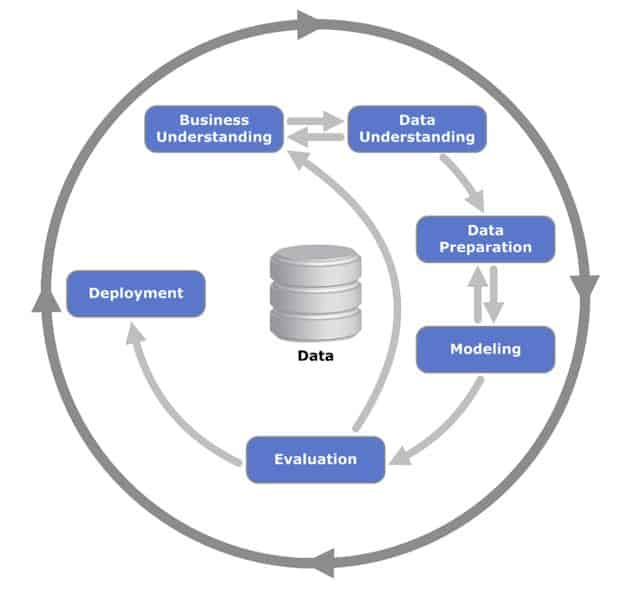

Exploratory Data Analysis is a process to perform initial investigations on a data set so as to discover patterns, spot anomalies or validate assumptions.

In this process, an analyst relies on summary statistics and visualizations. 

Important skills for conducting EDA with python include knowledge of python scripting, pandas and visualizations using matplotlib and/or seaborn

In [ ]:
#import the libaries to work with
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Set
The data set for this exercise is obtained online from the UCI machine learning repository. Click [here](https://archive-beta.ics.uci.edu/ml/datasets/online+retail) to visit the download page.

It is described as a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

In [ ]:
#load the data set

#data = pd.read_excel('OnlineRetail.xlsx', index_col=0, sheet_name='Online Retail')

#for the purpose of this class I saved the data as csv so that loading time is faster
data = pd.read_csv('OnlineRetail.csv',encoding='unicode-escape')
data.head()

## Understand the data
An introductory step is to look at the content of the data to get an idea of what you're going to be dealing with

In [ ]:
#view the shape of the data
#DataFrame.shape tells you the number of rows and columns contained in the dataframe
data.shape

In [ ]:
#check the head of the data
data.head(2)

In [ ]:
#check the tail of the data
data.tail()

In [ ]:
#view info relating to the data 
data.info()

In [ ]:
#there's another way to view data types using dtypes attribute
data.dtypes

In [ ]:
#if the data set has a large number of columns, you can view the column names by accessing the columns attribute
data.columns

In [ ]:
#use list comprehension to make columns upper case if you want
[x.upper() for x in data.columns]

In [ ]:
#loop through each column name

#Your code here
for a in data.columns:
    print(a)

In [ ]:
#view summary statistics with describe() method
data.describe()

In [ ]:
#why negative qunatity?
#--maybe loss?
#--maybe purchase?

## Cleaning and Manipulation

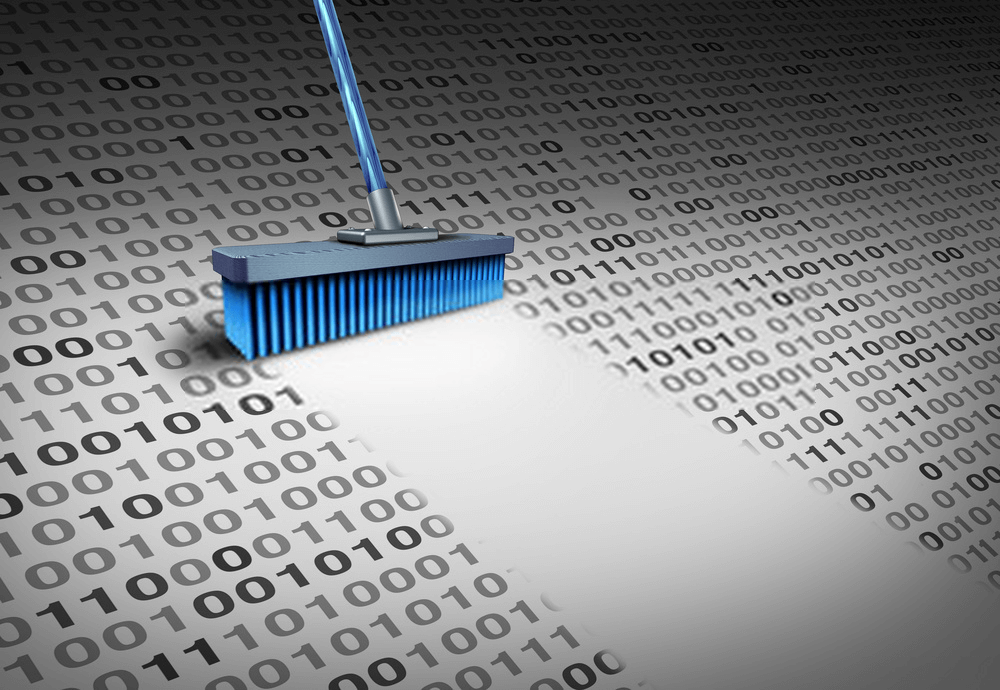

You may choose to delete rows or columns, modify content such as filling in empty values, etc

**Why clean your data?**

* Prevents time wastage
* Makes your analysis run faster
* You avoid making bad conclusions


**Broad Overview of Cleaning Steps**
* Handle empty values: you can delete them, fill them with a value that makes sense
* Check for data consistency: case may be important for strings, formatting, etc
* Handle outliers
* Remove duplicates
* Validate correctness of entries: age columns shouldn't contain text, for instance

In [ ]:
#check for missing data using isna().sum()
data.isna().sum()

In [ ]:
#what do the records with empty customer ID mean? Does it mean the sale was not recorded to a customer? 
#TODO: filter the dataframe using CustomerID.isna() as filter condition
data[data.CustomerID.isna()]

Question: what is the result of DataFrame.CustomerID.isna() as a mask? Is is a boolean or a dataframe?

In [ ]:
#run the code there
#data.CustomerID.isna()

In [ ]:
#Your answer here


In [ ]:
#what about records with empty descriptions? Use Description.isna()
data[data.Description.isna()]

#### TODO: return rows where both description and customerID are null

> Your code should look like `df[df.Col1.isna() & df.Col2.isna()]`



In [ ]:
#your code here



#### How many unique stock codes have no description?

> One option is to run code like this: `len(data[data.Description.isna()].StockCode.unique())`
> The code uses the `unique()` method to fetch an array of unique stock codes. The we use the `len()` function to calculate the length of the array

In [ ]:
#Run the code from the description above here


In [ ]:
#is your answer 960?


#### TODO: now use `nunique()` to count number of unique stock codes that have no description

> Your code should look like `df[df.description_column_name.isna()].stock_code_column_name.nunique()`

In [ ]:
#TODO: now use nunique() to count number of unique stock codes that have no description



#### What countries have sales with no description? 
>Use `value_counts()` on the filtered dataframe to count countries.

>Your code should look like `df[df.description_column_name.isna()].country_column_name.value_counts()`

In [ ]:
#your code here


**Was it the United Kingdom?**

#### TODO: What countries have sales with no customer ID and how many records are affected?

> Your code should look like `df[df.customer_id_column.isna()].country_column.value_counts()`

In [ ]:
#your code here



Assuming you don't want to keep records that have no description, you can choose to delete those rows.

In [ ]:
#check number of records that will be deleted


print('Total number of records: ',data.shape[0])
print('Number of records with missing description: ',data[data.Description.isna()].shape[0])
print('Number of records without missing description: ',data[data.Description.notna()].shape[0])

In [ ]:
#number of rows with missing descriptions
num_missing = data[data.Description.isna()].shape[0]

#number of rows in all the data set
num_all = data.shape[0]

#percentage of rows with missing description
(num_missing/num_all) * 100

In [ ]:
#one easy way to do this is to use notna() to select records that are not NaN

data_clean_desc = data[data.Description.notna()]

In [ ]:
#what are the rows with NaN values
data_clean_desc.isna().sum()

#### What are other cleaning activities you can do?
* Replace values e.g. replace EIRE or RSA with a more easily recognizable name



In [ ]:
data_clean_desc.Country.unique()

In [ ]:
#find records where country is EIRE
data_clean_desc[data_clean_desc.Country=='EIRE']

In [ ]:
#select the country column from the filtered dataframe

data_clean_desc[data_clean_desc.Country=='EIRE'].Country

In [ ]:
#let's see what the replace operation will do. Use Country.replace() in your syntax
#it will find 'EIRE' and replace with 'Ireland'

data_clean_desc[data_clean_desc.Country=='EIRE'].Country.replace('EIRE','Ireland')

In [ ]:
#apply the replace operation
data_clean_desc['Country'] = data_clean_desc.Country.replace('EIRE','Ireland')

In [ ]:
#data_clean_desc.loc[:,'Country'] = data_clean_desc.Country.replace('EIRE','Ireland')

In [ ]:
#check what you have done. do we now have rows with 'Ireland'?
data_clean_desc[data_clean_desc.Country=='Ireland'].head(2)

In [ ]:
#do we still have EIRE?
data_clean_desc[data_clean_desc.Country=='EIRE']

### Replace Missing Customer IDs

In [ ]:
#run value counts on customer id column to get a general idea of what counts are
data_clean_desc.CustomerID.value_counts()

In [ ]:
#run the code in the next line to see one way conversion can be done from float to string
#notice that we first convert to int64 to drop the decimals before converting to string

#data_clean_desc.CustomerID.astype('Int64').astype(str)

#### let's replace NaN CustomerID with 'Unidentified'

In [ ]:
#recall the data type of CustomerID here was originally float. We need to convert that to string
#in order to replace with 'Unidentified', we need the column data type to be string.
#i will first convert the float to integer so we drop the decimals, then convert to string

data_clean_desc['CustomerID'] = data_clean_desc.CustomerID.astype('Int64').astype('str')

In [ ]:
data_clean_desc.dtypes

In [ ]:
#check missing records
data_clean_desc.isna().sum()

In [ ]:
#how come there are no longer any missing customerm IDs after conversion?
#TODO: use value_counts() to group customer ID and show count per customer ID
#It will show us what the nulls have been converted to

data_clean_desc.CustomerID.value_counts()

In [ ]:
# we found that NaN was now represented as <NA> after it was converted to string using the method above
data_clean_desc[data_clean_desc.CustomerID=='<NA>']

In [ ]:
#replace every <NA> with 'Unidentified'
#using the parameter inplace applies the operation

data_clean_desc.CustomerID.replace('<NA>','Unidentified',inplace=True)

In [ ]:
#do we still have <NA>?
data_clean_desc[data_clean_desc.CustomerID=='<NA>']

In [ ]:
#do we now have 'Unidentified'?
data_clean_desc[data_clean_desc.CustomerID=='Unidentified']

In [ ]:
#check again with value_counts()
data_clean_desc.CustomerID.value_counts()

In [ ]:
data_clean_desc.isna().sum()

#### Question
Who could these unidentified customers be? Why would people visit an online store and make purchases yet their purchases won't be recorded with a customer ID?

In [ ]:
data_clean_desc[data_clean_desc.CustomerID=='Unidentified'].shape[0]/data_clean_desc.shape[0]

#### TODO: replace every 'unidentified' customer ID with an appropriate identifier based on your response to the question above

> Use the examples above to get the correct syntax.

In [ ]:


#Your code here


Check what you've done
#### TODO: display the stop few rows of the dataframe. Make sure to filter by the new identifier you have introduced
> Your code should look like `df[df.CustomerID=='identifier']`

In [ ]:

#Your code here


## Relationships & Insights

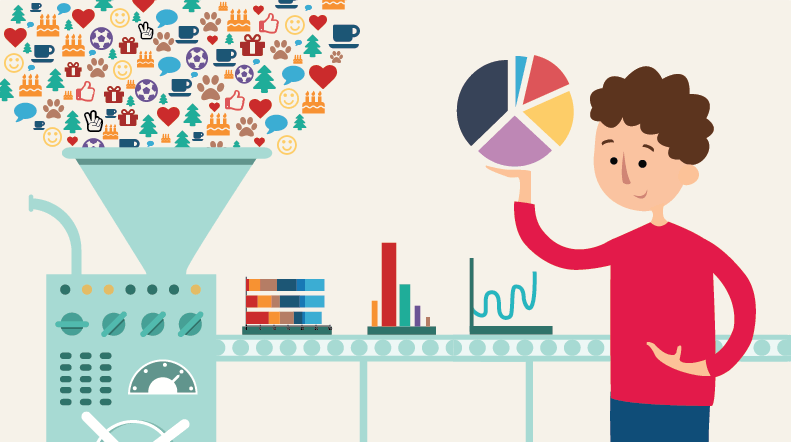

Look at relationships in the data and try to answer basic business questions so as to gain more insights

In [ ]:
data_clean_desc.head()

What is the average sale value or purchase value

In [ ]:
#let's calculate average sale value
#create a column as unit price * quantity

data_clean_desc['SaleValue'] = data_clean_desc.UnitPrice * data_clean_desc.Quantity

In [ ]:
data_clean_desc.head(2)

In [ ]:
#what does sale value contain
data_clean_desc['SaleValue'].head()

In [ ]:
#average price per sale
data_clean_desc.groupby('InvoiceNo').SaleValue.mean()

In [ ]:
#average sale value overall
data_clean_desc.SaleValue.mean()

What is the total sale value by country for the top 10 countries?

In [ ]:
#total sales value by country
data_clean_desc.groupby('Country').SaleValue.sum()

In [ ]:
#i want to view the numbers as integers
data_clean_desc.groupby('Country').SaleValue.sum().astype(int)

In [ ]:
#total sales value by country, give me top ten
data_clean_desc.groupby('Country').SaleValue.sum().astype(int)[:10]

In [ ]:
#the data above is not ordered. So order before taking top 10

In [ ]:
#total sales value by country
data_clean_desc.groupby('Country').SaleValue.sum().astype(int).sort_values(ascending=False)[:10]

What are the distributions of sales and quantities in the data set?

In [ ]:
#one way is to use a catplot from the seaborn library and chose box plot in the parameters
sns.catplot(data=data_clean_desc,kind='box')

In [ ]:
#another way is to individually plot boxplots
sns.boxplot(y=data_clean_desc.SaleValue)

In [ ]:
#use xlim() or ylim() from matplotlib to change scale on x or y axis as may be required

sns.boxplot(y=data_clean_desc.SaleValue)
plt.ylim(-25,50)

What does a box plot tell you?

In [ ]:
#TODO: make a similar box plot for the quantity column
sns.boxplot(y=data_clean_desc.Quantity)
plt.ylim(-25,50)

In [ ]:
sns.violinplot(y=data_clean_desc.Quantity)
plt.ylim(-5000,10000)

In [ ]:
#sns.pairplot(data=data_clean_desc)

What is the total sales quantity by country for the top 10 countries?

In [ ]:
#total sales quantities by country
data_clean_desc.groupby('Country').Quantity.sum().sort_values(ascending=False)[:10]

Display the top 10 countries by sales quantity in a pie chart or bar chart

In [ ]:
#total sales quantities by country
top_ten = data_clean_desc.groupby('Country').Quantity.sum().sort_values(ascending=False)[:10]

In [ ]:
top_ten

In [ ]:
#use horizontal bar chart to visualize top 10
#use the series index as vertical axis and series values as horizontal axis of the barh() plot

plt.barh(y=top_ten.index, width=top_ten)
plt.show()

In [ ]:
#let's try a pie chart
plt.figure(figsize=(10,10))
plt.pie(top_ten,labels=top_ten.index)
plt.show()

In [ ]:
#use vertical bar chart to visualize top 10
plt.bar(x=top_ten.index[:3], height=top_ten[:3])

plt.title('Top Countries by Sales Quantity')
plt.xlabel('Country')
plt.ylabel('Quantity')

plt.show()

In [ ]:
#average sales quantity by country
#data_clean_desc.groupby('Country').Quantity.mean().sort_values(ascending=False)

Check sales trend by date

In [ ]:
#convert invoice date to datetime
data_clean_desc['InvoiceDate'] = pd.to_datetime(data_clean_desc.InvoiceDate)

In [ ]:
data_clean_desc.dtypes

In [ ]:
#sales quantity by dates
data_clean_desc.groupby('InvoiceDate').Quantity.sum()

In [ ]:
#sales quantity by dates
plt.figure(figsize=(15,10))
data_clean_desc.groupby('InvoiceDate').Quantity.sum().plot()

plt.ylim(0,20000)

In [ ]:
# earliest and latest dates
print('Earliest date: ',data_clean_desc.InvoiceDate.min())
print('Latest date: ',data_clean_desc.InvoiceDate.max())

Other visualizations

In [ ]:
%%time
#view relationships between columns
#i'm doing pairplot on just a subset of the data because it runs for a w
sns.pairplot(data_clean_desc.sample(1000))


In [ ]:
#distplot
sns.displot(data = data_clean_desc.sample(1000))
plt.xlim(0,100) #limit x axis to the section of interest


In [ ]:
#scatter plot
plt.scatter(data_clean_desc.Quantity, data_clean_desc.SaleValue)
plt.xlim(-1000,10000)
plt.ylim(-1000,10000)

In [ ]:
data_clean_desc[data_clean_desc.SaleValue<-20000]

### Questions for Store Manager

1. What is an invoice number that starts with C?
2. What are sales where quantity is negative?

In [ ]:
#TODO: how many returns were recorded in this sales period

data_clean_desc[data_clean_desc.Quantity<0].shape[0]

## Summary

1. UK makes the most sales? get percentage
2. Guest purchases are the most? get percentage. Can we get them to register more? Then make personalized offers?
3. Expand in the other top 10 countries
4. Opportunity? Why are the non-top 10 countries not selling more?


#### Create Interative Plots with Plotly and Cufflinks

In [ ]:
# pip install plotly and cufflinks if you don't alredy have them

!pip install plotly
!pip install cufflinks

In [ ]:
#import plotly and cufflinks
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [ ]:
#initialize plotly. We're planning to use it offline for cases when you're not on the internet
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
#plot Quantity against sale value
#i'm using a sample of 1000 records so it doesn't run for too long
data_clean_desc.sample(1000).iplot(kind='scatter',x='Quantity', y='SaleValue', mode='markers')

When you hover over points in the chart you'll notice it displays a tool tip containing the value of the point. Plotly can make your charts more interactive.

Hover over the chart and select the zoom tool at the top right to zoom into any part of the chart.


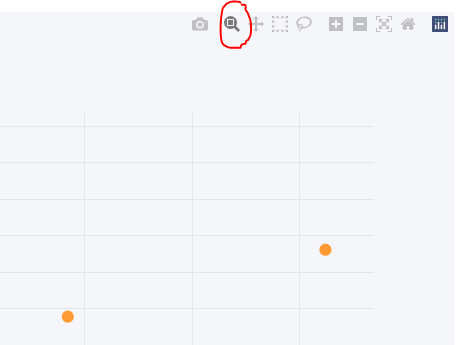


Here's an example:

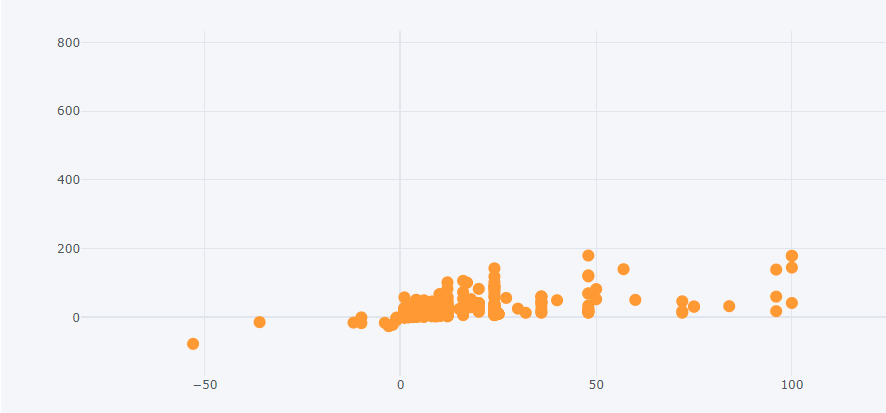

In [ ]:
data_clean_desc.Country.value_counts().iplot(kind='bar')

### Bonus: Pandas Profiling

Pandas profiling is a package that allows you to create interactive column by column analysis. It can automate the process of basic EDA for you

In [ ]:
#import pandas-profiling
from pandas_profiling import ProfileReport

In [ ]:
#create profile report
ProfileReport(data_clean_desc)

In [ ]:
#save profile report to interactive html page
ProfileReport(data_clean_desc).to_file('interactive_profile_report.html')